# RRI Machine Learning Workshop

<b> 0) Overview of machine learning</b>

<b>1) Introduction to scikit-learn</b>    
    
<b>2) Introduction to nilearn</b>  

<b>3) Introduction to neuropredict</b>

## Acknowledgements/Sources:

Some of these examples are based on examples from the following very helpful resources:
* The [Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook) by Jake VanderPlas
* The [scikit-learn documentation](https://scikit-learn.org/stable/)  

Another great resource:
* [Andrew Ng's Machine Learning course on Coursera](https://www.coursera.org/learn/machine-learning)

# Introduction to machine learning

## What is machine learning?

Machine learning is when a computer learns from <b>experience E</b> with respect to some <b>task T</b> and some <b>performance measure P</b>. If performance (as measured by P) on task T improves with experience E, the computer program is said to learn. - Tom Mitchell (computer scientist at Carnegie Mellon University)

<b>Example: recognizing spam emails</b>  
Task: classfying emails as spam or not spam  
Experience: from emails that are already labeled as spam or not spam  
Performance: fraction of emails correctly classified

Machine learning allows for <b>pattern recognition</b> and <b>prediction</b>.

## Different types of machine learning

* <b>Supervised learning</b>: learn labels for different classes based on sets of features
    * "teach" the computer how to do something
* <b>Unsupervised learning</b>: learn hidden structures in a set of features
    * allow the computer to "learn" on its own
* <b>Reinforcement learning</b>: given a sequence of states and actions with rewards, determine a policy, i.e. a mapping from states to actions (what action should you perform in a given state?)
    * e.g. chess: 
        * state = position of pieces on the board
        * action = what is the best move to make given the state?
        * reward = winning the game


# Supervised machine learning


## How does supervised machine learning work?

1) First, we need to represent our data as a set of <b>observations</b> and <b>features</b>
* Make a matrix where the rows are observations and the columns are different features

2) Then, we need to define our <b>outputs</b>
* If the output is continuous, we will run a <b>regression</b> algorithm
* If the output is categorical (labels), we will run a <b>classification</b> algorithm
    
How do we represent categorical outputs?  
With 1s and 0s.

What if we have more than two classes?  
With "one-hot encoding".

3) We will need to partition our data into two or three subsets.
    a) The first set is called the <b>training set</b>. This will be used to train our model.
    b) The second set is called the <b>validation set</b>. We will need to use a validation set if we are training any <b>hyperparameters</b> in our model. Hyperparameters are parameters in the model that that model does not learn; they must be set beforehand. However, different values of these parameters can affect the model performance, so we want to see which value is associated with the best performance on the validation set.
    c) The final set is called the <b>test set</b>. This set is used as a final dataset to see how well the trained model performs on data that it has never seen before. 

4) Next, we define a function that will allow us to map our features to our outputs/labels

5) We also need to define a function that allows us to evaluate how well the function in 4) is performing. In other words, what is the difference, or <b>error</b>, between the outputs that are predicted by our model, and the actual outputs? The function we define here is called a <b>cost function</b> or <b>loss function</b>.

6) We then want to <b>minimize</b> the error: we want the difference between the predicted and actual outputs to be as small as possible. One way of doing this is with an optimization algorithm called <b>gradient descent</b>. 
* We can find the minimum of the function by moving in the negative direction of the gradient (the slope of the loss function at a given point) to reach the local/global minima.

7) Once we use gradient descent to find the <b>optimal model parameters</b>, we can <b>evaluate</b> the performance of our final model on a <b>left-out</b> subset of the data (i.e. the <b>test set</b>).


### Let's run through an example of linear regression

We want to predict a set of continuous outputs from a set of continuous inputs.
We'll start simple: let's just work with one feature.

First, import some packages that we'll need to run linear regression:

In [1]:
# import packages

import numpy as np, pandas as pd, seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('seaborn')

## Linear Regression

* <b>Goal</b>: predict continuous scores Y from continuous scores X

original shape of x: (1000,)
original shape of y: (1000,)
new shape of x: (1000, 1)
new shape of y: (1000, 1)


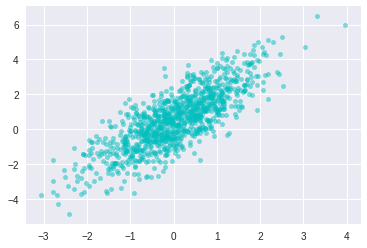

In [2]:
# make some data

np.random.seed(1)
x = np.random.randn(1000)
y = 1.34*x + 0.52
print('original shape of x:', x.shape)
print('original shape of y:', y.shape)
x = x[:, np.newaxis]
y = y[:, np.newaxis]
print('new shape of x:', x.shape)
print('new shape of y:', y.shape)

noise = np.random.randn(x.shape[0])
noise = (noise - np.mean(noise))/np.std(noise)
noise = noise[:, np.newaxis]
y = y + noise

plt.scatter(x,y,s=20,alpha=.5,c='c'); plt.show()

Now we want to define a function to map our x-values to our y-values. In the case of linear regression, we simply use the equation for a line: i.e. y = mx + b

In [3]:
# define our function for prediction

def predict(x,m,b):
    ypred = m*x + b
    return ypred

Now we'll define our cost/loss function. For linear regression, we will use the mean squared error.

In [4]:
# define loss function

def calc_loss(y, ypred):
    loss = 1/y.shape[0] * np.sum((y - ypred)**2)
    #loss = 1/y.shape[0] * np.sum((y - (m*x + b))**2)
    return loss

Next, we want to take the derivative of the loss function with respect to each parameter that we want to optimize (m and b). In other words, we take the <b>partial derivatives</b>. 

In [5]:
# partial derivative w.r.t. m
def calc_grad_m(x, y, ypred):
    grad_m = (-2/y.shape[0]) * np.sum(x*(y - ypred))
    return grad_m
    
# partial derivative w.r.t. b
def calc_grad_b(y, pred):
    grad_b = (-2/y.shape[0]) * np.sum((y - ypred))
    return grad_b

We can make a <b>contour plot</b> of what the loss will be for different combinations of m and b:

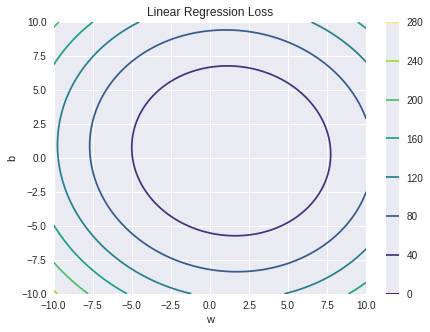

In [6]:
# make contour plot of losses

def make_contours(WW,BB,X,Y):
    nsteps = np.shape(WW)[0]
    z = np.zeros((nsteps, nsteps))
    for i in range(nsteps):
        for j in range(nsteps):
            ypred = predict(X, WW[i,j], BB[i,j])
            z[i,j] = calc_loss(Y, ypred)
    return z

nsteps = 100
cl = 10
ww = np.linspace(-cl, cl, nsteps)
cl = 10
bb = np.linspace(-cl, cl, nsteps)
WW, BB = np.meshgrid(ww,bb)
z = make_contours(WW, BB, x, y)

fig = plt.figure(figsize=(7,5))
plt.xlim(-cl,cl); plt.ylim(-cl,cl)
plt.contour(WW, BB, z, cmap='viridis')
plt.xlabel('w'); plt.ylabel('b')
plt.title('Linear Regression Loss')
plt.colorbar()
plt.show()


Let's run gradient descent.  
We will start by randomly initializing `m` and `b`.   
Then, we will define the number of iterations (`iters`) and the learning rate/step size for gradient descent (`learning_rate`).  

For each iteration of gradient descent:  
1) Predict y-values based on the current values of m and b and our data (x).  
2) Calculate the overall loss, and the partial derivatives for m and b.  
3) Update m and b by subtracting the respective loss, weighted by the learning rate.  

After the final iteration: make final predictions of the y values based on the optimized values of m and b.

In [7]:
# initialize our parameters 
m = np.random.rand(1)
b = np.random.rand(1)

# define iterations and learning rate
iters = 1000
learning_rate = 0.01

# run gradient descent
losses = []
grads_m = []
grads_b = []
all_m = []
all_b = []
for iter in range(iters):
    
    # make predictions
    ypred = predict(x, m, b)
    
    # calculate loss and partial derivatives
    loss = calc_loss(y, ypred)
    grad_m = calc_grad_m(x, y, ypred)
    grad_b = calc_grad_b(y, ypred)
    
    # update m and b
    m = m - learning_rate*grad_m
    b = b - learning_rate*grad_b
    
    # append values from this iteration
    losses.append(loss)
    grads_m.append(grad_m)
    grads_b.append(grad_b)
    all_m.append(m)
    all_b.append(b)
    
# final ypred
ypred = predict(x, m, b)

print('Final loss (m): ', grads_m[-1])
print('Final loss (b): ', grads_b[-1])
print('Final value of m: ', m)
print('Final value of b: ', b)

Final loss (m):  -2.692727685271734e-09
Final loss (b):  3.1803232047877827e-10
Final value of m:  [1.36228018]
Final value of b:  [0.51913525]


In the code in the above cell, we also kept track of the overall loss and the gradients. Let's plot these to see what they look like.

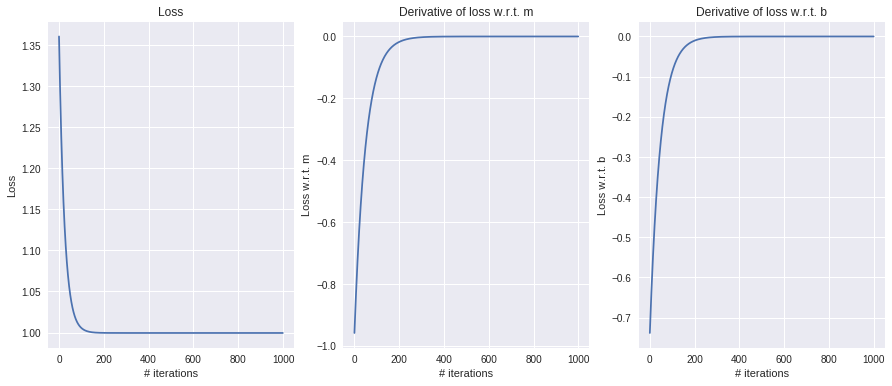

In [8]:
fig = plt.figure(figsize=(15,6))

plt.subplot(131); plt.title('Loss');
plt.plot(np.arange(iters), losses)
plt.xlabel('# iterations')
plt.ylabel('Loss')

plt.subplot(132); plt.title('Derivative of loss w.r.t. m')
plt.plot(np.arange(iters), grads_m)
plt.xlabel('# iterations')
plt.ylabel('Loss w.r.t. m')

plt.subplot(133); plt.title('Derivative of loss w.r.t. b')
plt.plot(np.arange(iters), grads_b)
plt.xlabel('# iterations')
plt.ylabel('Loss w.r.t. b')

plt.show()

As we can see from the plots, the loss gets smaller with each iteration, as do the absolute values of the gradients.   

Let's see what happens when we change the number of iterations and the learning rate. Try re-running the model with more and fewer iterations, and with a larger and smaller learning rate. What do you think will happen?

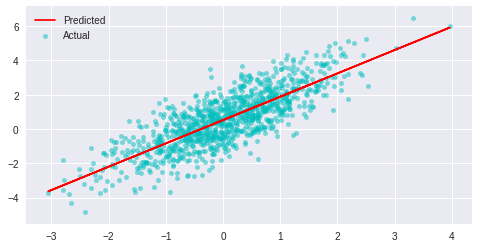

In [9]:
fig = plt.figure(figsize=(8,4))
plt.plot(x, ypred, c = 'r',label='Predicted')
plt.scatter(x, y, s=20, alpha=.5, c='c', label='Actual')
plt.legend()
plt.show()

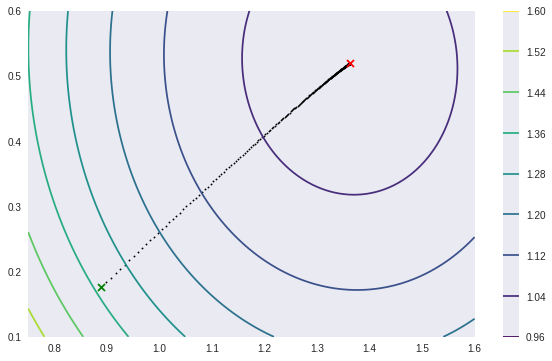

In [10]:
nsteps = 100
m1, m2 = 0.75, 1.6
b1, b2 = 0.1, .6
ww = np.linspace(m1, m2, nsteps)
bb = np.linspace(b1, b2, nsteps)
WW, BB = np.meshgrid(ww,bb)
z = make_contours(WW, BB, x, y)

fig = plt.figure(figsize=(10,6))
plt.xlim(m1,m2); plt.ylim(b1,b2)
plt.contour(WW, BB, z, cmap='viridis')
plt.grid('off')
plt.colorbar()
#plt.plot(all_m, all_b, '--',color='grey')
plt.scatter(all_m, all_b, color='black',s=2)
plt.scatter(all_m[0],all_b[0],marker='x',c='green')
plt.scatter(all_m[-1],all_b[-1],marker='x',c='red')
plt.show()

# Machine learning with scikit-learn

Scikit-learn is one of the primary libraries used for machine learning in Python.

### Typical workflow:

Prepare data  
split into train/(validation)/test sets  
create an instance of a classifier  
fit the model  
make predictions  
evaluate the model

In [11]:
# let's run a linear regression using scikit-learn

# import the Linear Regression class
from sklearn.linear_model import LinearRegression

# make an instance of the class
lm = LinearRegression()

# fit the model
lm.fit(x,y)

# predict y
ypred_sklearn = lm.predict(x)

# let's see what the parameters are 
print('scikit-learn m: ', lm.coef_)
print('scikit-learn b: ', lm.intercept_)

# compare to our code:
print('Final value of m: ', m)
print('Final value of b: ', b)


scikit-learn m:  [[1.36228018]]
scikit-learn b:  [0.51913525]
Final value of m:  [1.36228018]
Final value of b:  [0.51913525]


In [12]:
# import some data

from sklearn.datasets import load_digits, load_iris
digits = load_digits()
iris = load_iris()

In [13]:
# iris dataset: what are the features?
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

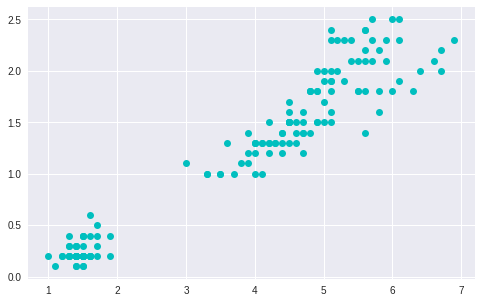

In [14]:
# let's try predicting petal width from petal length

X = iris.data[:,2] # petal length
y = iris.data[:,3] # petal width
X = X[:,np.newaxis]
y = y[:,np.newaxis]

# plot the data
fig = plt.figure(figsize=(8,5))
plt.plot(X, y,'o',color='c')
plt.show()

[[0.41637834]] [-0.36947008]
0.9316265852015047
0.9159475920368934


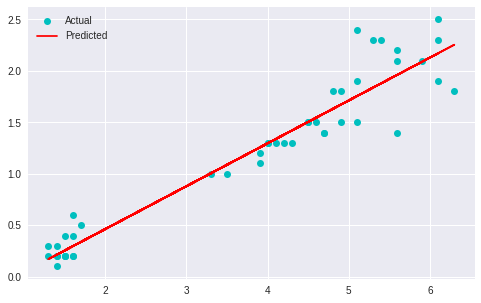

In [15]:
# run the model

from sklearn.model_selection import train_test_split
from sklearn import metrics

# first, split into train and test sets
np.random.seed(5)
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.3)

# make instance of class
lm = LinearRegression()

# fit the model
lm.fit(Xtrain, ytrain)

# make predictions
ypred = lm.predict(Xtest)

# print optimized paramters
print(lm.coef_, lm.intercept_)

# print score: for linear regression, the default is R-squared
print(lm.score(Xtrain, ytrain))
print(lm.score(Xtest, ytest))

# plot test data and regression line
fig = plt.figure(figsize=(8,5))
plt.plot(Xtest, ytest, 'o', color='c', label='Actual')
plt.plot(Xtest, ypred, color='r', label='Predicted')
plt.legend(); plt.show()

# Classification

Predict categorical values Y from a set of continuous features X.



## Logistic regression

Use the <b>sigmoid activation function</b> to convert outputs to probabilities.

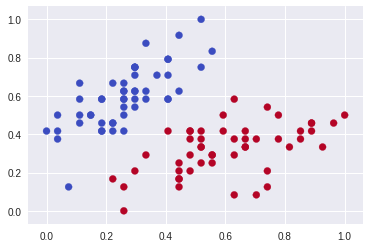

In [16]:
# define data
X = iris.data
y = iris.target
inds = np.logical_or(iris.target==0, iris.target==1)

X = X[inds,0:2]
y = y[inds]

# standardize data so each column has min of 0, max of 1
X = (X - np.min(X,axis=0)) / (np.max(X,axis=0) - np.min(X,axis=0))

plt.scatter(X[:,0], X[:,1],c=y,cmap='coolwarm')

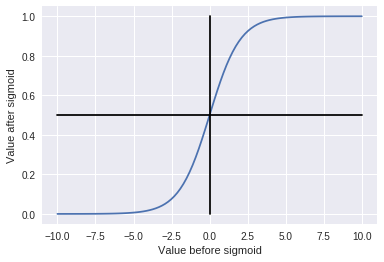

In [17]:
# define our function for prediction

def sigmoid(x):
    return 1/(1+np.exp(-x))

xx = np.linspace(-10,10,100)
yy = sigmoid(xx)

plt.plot(xx,yy); 
plt.plot([0,0],[0,1],c='black')
plt.plot([-10, 10],[0.5, 0.5],c='black')
plt.xlabel('Value before sigmoid')
plt.ylabel('Value after sigmoid')
plt.show()

theta =  [[ 18.40552148]
 [-16.34622767]]
bias =  [[-0.15667865]]
test set accuracy =  1.0


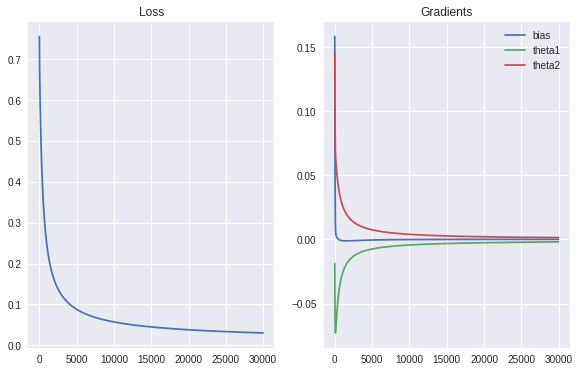

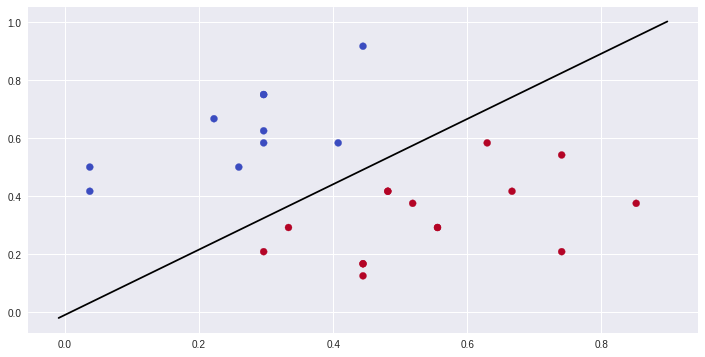

In [18]:
# note: this section has been updated

# predictions (of probabilities)
def predict_prob(x,theta,bias):
    ypred = sigmoid(np.dot(x,theta)+bias)
    return ypred[:,0]

# loss
def calc_loss(y, ypred):
    loss = 1/y.shape[0] * np.sum(-y * np.log(ypred) - (1 - y) * np.log(1 - ypred))
    return loss

# gradient
def calc_grad_theta(x, y, ypred):
    grad = 1/y.shape[0] * np.matmul(x.T, (ypred - y))
    grad = grad[:, np.newaxis]
    return grad

def calc_grad_bias(y,pred):
    grad = 1/y.shape[0] * np.sum(ypred-y)
    #grad = grad[:, np.newaxis]
    return grad

# accuracy
def calc_accuracy(y, ypred):
    h = np.zeros(ypred.shape)
    h[ypred>=0.5] = 1
    return np.sum(h==y)/y.shape[0]


# initialize our parameters 
np.random.seed(1)
theta = np.random.rand(2,1)
bias = np.random.rand(1,1)

# split into train and test
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y)

# define iterations 
iters = 30000
learning_rate = 0.1

# run gradient descent
losses = []
grads_theta = []
grads_bias = []
for iter in range(iters):
    ypred = predict_prob(Xtrain, theta, bias)
    loss = calc_loss(ytrain, ypred)
    grad_theta = calc_grad_theta(Xtrain, ytrain, ypred)
    grad_bias = calc_grad_bias(ytrain, ypred)
    theta = theta - learning_rate*grad_theta
    bias = bias - learning_rate*grad_bias
    losses.append(loss)
    grads_theta.append(grad_theta)
    grads_bias.append(grad_bias)

# final ypred
ypred = predict_prob(Xtest, theta, bias)
grads_theta = np.squeeze(grads_theta)
print('theta = ', theta)
print('bias = ', bias)
print('test set accuracy = ', calc_accuracy(ytest, ypred))
      
fig = plt.figure(figsize=(15,6))
plt.subplot(131); plt.title('Loss')
plt.plot(np.arange(iters), losses)
plt.subplot(132); plt.title('Gradients')
plt.plot(np.arange(iters), grads_bias)
plt.plot(np.arange(iters), grads_theta)
plt.legend(['bias', 'theta1', 'theta2'])
plt.show()

fig = plt.figure(figsize=(12,6))
plt.scatter(Xtest[:,0], Xtest[:,1],c=ytest,cmap='coolwarm')
xvals = np.array(plt.gca().get_xlim())
xvals = np.reshape(xvals,[-1, 1])
yvals = -(xvals*theta[0] + bias) /theta[1]
plt.plot(xvals,yvals,c='black')
plt.show()


Another way of running this is to add a column of ones to our feature matrix (X). This way, we can include the bias term in theta (theta0).

theta =  [[ -0.15418547]
 [ 18.41324665]
 [-16.35890107]]
test set accuracy =  1.0


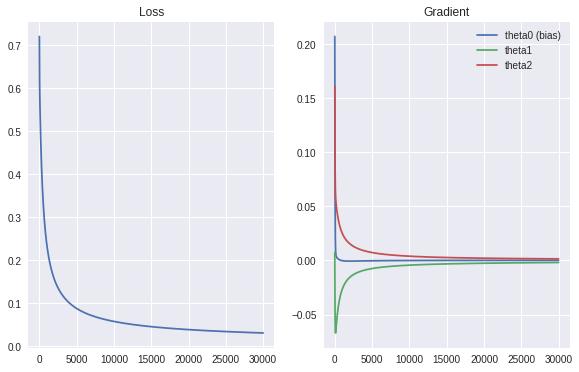

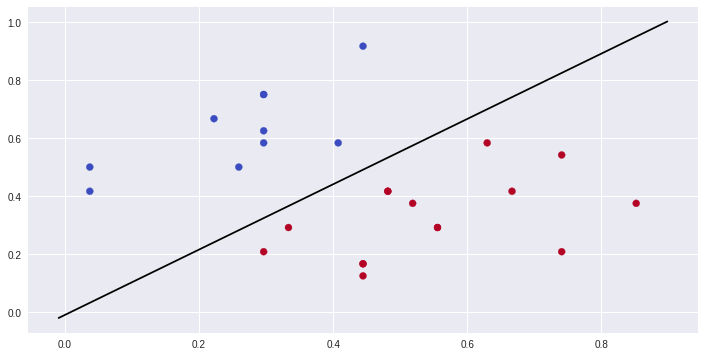

In [19]:
# predictions (of probabilities)
def predict_prob(x,theta):
    ypred = sigmoid(np.dot(x,theta))
    return ypred[:,0]

# loss
def calc_loss(y, ypred):
    loss = 1/y.shape[0] * np.sum(-y * np.log(ypred) - (1 - y) * np.log(1 - ypred))
    return loss

# gradient
def calc_grad(x, y, ypred):
    grad = 1/y.shape[0] * np.matmul(x.T, (ypred - y))
    grad = grad[:, np.newaxis]
    return grad

# accuracy
def calc_accuracy(y, ypred):
    h = np.zeros(ypred.shape)
    h[ypred>=0.5] = 1
    return np.sum(h==y)/y.shape[0]


# initialize our parameters 
np.random.seed(1)
theta = np.random.rand(3,1)

# add bias to X
intercept = np.ones((X.shape[0],1))
X = np.concatenate((intercept,X), axis=1)

# split into train and test
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y)

# define iterations 
iters = 30000
learning_rate = 0.1

# run gradient descent
losses = []
grads = []
for iter in range(iters):
    ypred = predict_prob(Xtrain, theta)
    loss = calc_loss(ytrain, ypred)
    grad = calc_grad(Xtrain, ytrain, ypred)
    theta = theta - learning_rate*grad
    losses.append(loss)
    grads.append(grad)

# final ypred
ypred = predict_prob(Xtest, theta)
grads = np.squeeze(grads)
print('theta = ', theta)
print('test set accuracy = ', calc_accuracy(ytest, ypred))
      
fig = plt.figure(figsize=(15,6))
plt.subplot(131); plt.title('Loss')
plt.plot(np.arange(iters), losses)
plt.subplot(132); plt.title('Gradient')
plt.plot(np.arange(iters), grads)
plt.legend(['theta0 (bias)', 'theta1', 'theta2'])
plt.show()

fig = plt.figure(figsize=(12,6))
plt.scatter(Xtest[:,1], Xtest[:,2],c=ytest,cmap='coolwarm')
xvals = np.array(plt.gca().get_xlim())
xvals = np.reshape(xvals,[-1, 1])
yvals = -(xvals*theta[1] + theta[0]) /theta[2]
plt.plot(xvals,yvals,c='black')
plt.show()


# Logistic Regression in scikit-learn

A few notes:

* Regularization: constrains the weights to prevent them from getting too large; helps prevent overfitting the training data
    * C: "amount" of regularization: Inverse of regularization strength, where smaller values = stronger regularization  
    
    
    
* Uses stochastic average gradient descent solver: https://github.com/scikit-learn/scikit-learn/blob/a24c8b46/sklearn/linear_model/logistic.py#L1176

Accuracy =  100.0 %
Weights:  [[ 16.74309715 -14.7280614 ]]
Intercept:  [0.09089679]


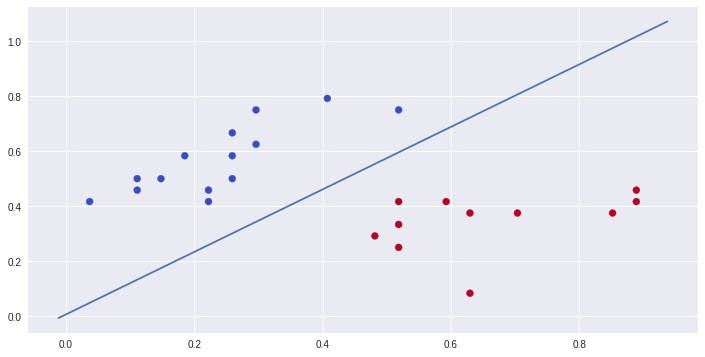

In [20]:
# logistic regression

from sklearn.linear_model import LogisticRegression

# we don't need to include the intercept in X when we use scikit-learn
# so let's remove it
X = X[:,1:]
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y)


# instantiate the model
clf = LogisticRegression(penalty='l2', C=80.0, max_iter=20000, tol=1e-20)

# fit to training data
clf.fit(Xtrain, ytrain)

# predict y
ypred = clf.predict(Xtest)

# evaluate model accuracy
print('Accuracy = ', metrics.accuracy_score(ypred, ytest)*100, '%')

print('Weights: ', clf.coef_)
print('Intercept: ', clf.intercept_)

fig = plt.figure(figsize=(12,6))
plt.scatter(Xtest[:,0], Xtest[:,1],c=ytest,cmap='coolwarm')
xvals = np.array(plt.gca().get_xlim())
xvals = np.reshape(xvals,[-1, 1])
yvals = -(xvals*clf.coef_[0][0] + clf.intercept_) /clf.coef_[0][1]
plt.plot(xvals,yvals)
plt.show()


# Support Vector Machines

<b>Source</b>: https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html

Find boundaries that best separates data.  
We want to maximize the margins that can be drawn around this boundary.
In the case of a linear boundary, the margin the width between the boundary line and a parallel line that just touches the nearest data point.  

Here is an illustration:

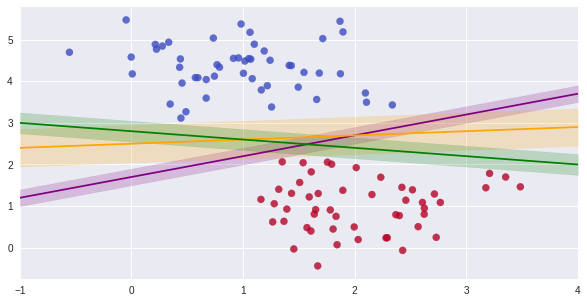

In [21]:
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
from sklearn.datasets.samples_generator import make_circles

Xl, yl = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.6)

fig = plt.figure(figsize=(10,5))
plt.scatter(Xl[:, 0], Xl[:, 1], c=yl, s=50, cmap='coolwarm', alpha=.8);
x = np.linspace(-1, 4)
y1 = 0.5*x+1.7
y2 = 0.1*x + 2.5
y3 = -0.2*x + 2.8
margin1 = .2
margin2 = .45
margin3 = .25
plt.plot(x,y1,c='purple')
plt.plot(x,y2,c='orange')
plt.plot(x,y3,c='green')
plt.fill_between(x,y1-margin1,y1+margin1,color='purple',alpha=.2)
plt.fill_between(x,y2-margin2,y2+margin2,color='orange',alpha=.2)
plt.fill_between(x,y3-margin3,y3+margin3,color='green',alpha=.2)
plt.xlim([-1, 4])
plt.show()

In the example above, we can see three examples of potential boundaries that are all successful in separating the two classes of datapoints (there are more than three possible lines!).  

However, for each line, we can draw two surrounding lines (with equal margins on each side) to show how far away each boundary line is from the closest example in each class. (The margin has to be the same on both sides, so the width is equal to the distance between the boundary line and the closest data point.) 

We can clearly see that the orange line has the largest margin, so this would be the line that the SVM algorithm chooses!  

SVMs are called <b>maximum margin estimators</b> for this reason.

SVMs use <b>kernel functions</b> to define the boundaries. Kernels allow us to project our data into a higher-dimensional space. 

In the example above, the data can be separated using a <b>linear</b> kernel.  

Let's take another dataset. This data is clearly not separable using a line. 

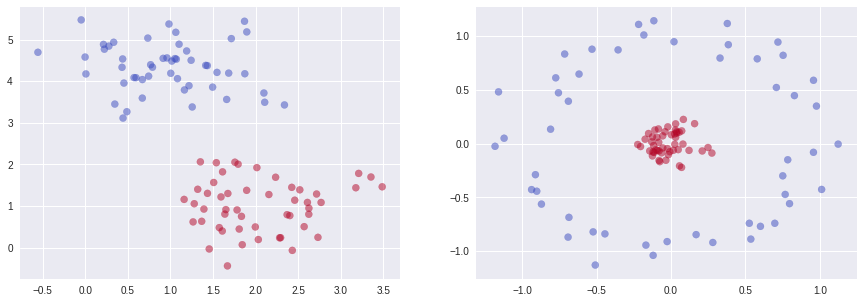

In [22]:
Xc, yc = make_circles(100, factor=.1, noise=.1)

fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(Xl[:, 0], Xl[:, 1], c=yl, s=50, cmap='coolwarm', alpha=.5);
plt.subplot(1,2,2)
plt.scatter(Xc[:, 0], Xc[:, 1], c=yc, s=50, cmap='coolwarm', alpha=.5); plt.show()

We can use a <b>radial basis function</b> to project the data into a higher-dimensional space where it *can* be linearly separated. 

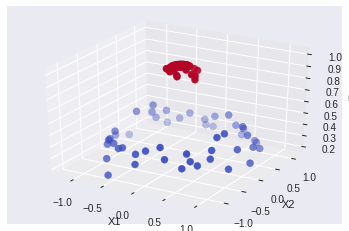

In [23]:
# make the radial basis function:

r = np.exp(np.sum(-((Xc)**2),1))

# plot the data projection
from mpl_toolkits import mplot3d
ax = plt.subplot(projection='3d')
ax.scatter3D(Xc[:,0],Xc[:,1],r, c=yc, s=50, cmap='coolwarm')
ax.set_xlabel('X1'), ax.set_ylabel('X2'), ax.set_zlabel('r')
plt.show()

Now we can see that we can use a linear kernel for the first dataset, and an RBF kernel for the second dataset.

Let's see how we can run SVMs with different kernels in sklearn.

In [24]:
# define the models
model_linear = SVC(kernel='linear', C=1e10) # use a linear kernel
model_rbf = SVC(kernel='rbf', C=1e10)

# fit the models
model_linear.fit(Xl, yl)
model_rbf.fit(Xc, yc)

# support vectors (define the margin)
print(model_linear.support_vectors_,'\n')
print(model_rbf.support_vectors_)

[[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [1.35139348 2.06383637]] 

[[ 0.32974474  0.79608639]
 [ 0.78462418 -0.14987855]
 [-0.68944723  0.3945244 ]
 [ 0.16894625 -0.84613484]
 [-0.80908957  0.1343266 ]
 [ 0.2748508  -0.08759171]]


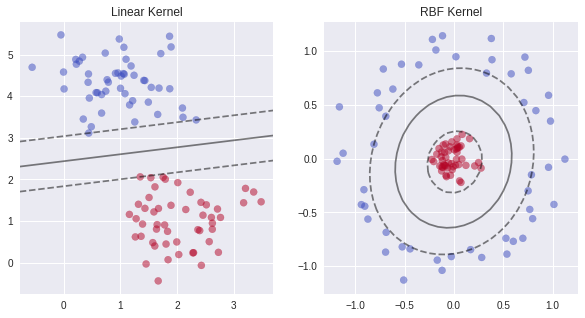

In [25]:
def plot_svc_decision_function(model):
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    

fig = plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(Xl[:, 0], Xl[:, 1], c=yl, s=50, cmap='coolwarm', alpha=.5)
plot_svc_decision_function(model_linear);
plt.title('Linear Kernel')

plt.subplot(1,2,2)
plt.scatter(Xc[:, 0], Xc[:, 1], c=yc, s=50, cmap='coolwarm', alpha=.5)
plot_svc_decision_function(model_rbf); 
plt.title('RBF Kernel')
plt.show()

We can change the regularization parameter (`C`) to see how this affects the definition of the margins.

When we are testing multiple classes, we would like to get a sense of which observations were misclassified, and the incorrect label that these examples were assigned to. We can assess this using the `confusion_matrix` function.

Accuracy =  98.22222222222223 %


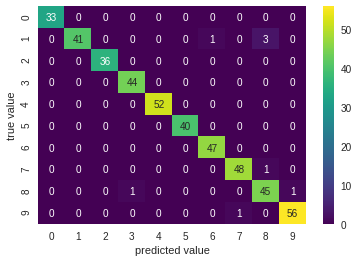

In [26]:
# digits dataset

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target)

clf = SVC(kernel='linear')
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)

print('Accuracy = ', metrics.accuracy_score(ypred, ytest)*100,'%')

sns.heatmap(metrics.confusion_matrix(ypred, ytest), annot=True,
           cmap=plt.cm.viridis)
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()

There are many other classification algorithms in sklearn that you can explore. Here are a few examples:

* Decision Trees: `sklearn.tree.DecisionTreeClassifier`: like a flow-chart: each node tests an attribute, and each branch represents the outcome  

* Random Forests: `sklearn.ensemble.RandomForestClassifier`: ensemble of decision trees that are merged together. This ensemble method gives more accurate and stable predictions compared to just a single decision tree.  

* Gaussian Naive Bayes (GNB): `sklearn.naive_bayes.GaussianNB`: uses Bayes theorem to calculate the probability of a hypothesis given the data that we have and prior probabilities:

$$P(H|D) = \frac{P(D|H)P(H)}{P(D)}$$

## Evaluating our models: Cross-validation

Recall from the logistic regression example that we randomly split our data into training and test sets. When the data are randomly partitioned, we can end up with different accuracies on the test set depending on which examples end up in the training and test sets.  

Therefore, it is advisable to train and test our model on different training and test sets. This way, we can get an average measure of our model's performance. Especially when we have smaller datasets, if we only run our model with a single training set and a single test set, it is possible to over- or under-estimate how well our model can actually perform.  

For instance, if by chance we end up with a test set that contains several outliers but a training set that does not contain any outliers, the performance on our test set will be quite low.  

One method of cross-validation is called <b>k-fold cross validation</b>. With this method, we divide our data into <i>k</i> sets. We train our model on all but one of the <i>k</i> sets, and test the model on the remaining set. We repeat this process <i>k</i> times, each time leaving out the <i>k</i>th subset of data. Then, we can look at the accuracy for each fold, and take a summary measure, such as the mean or median of the <i>k</i> accuracy scores.  

In the example below, we will use <i>k</i>=10, so we will end up with 10 accuracy scores.

Note that all we have to do is define a classifier (`clf` below). The `cross_val_score` function will call on the `.fit` and `.predict` functions and keep track of the scores, so you don't have to do this yourself.

In [27]:
# K-fold cross validation

from sklearn.model_selection import cross_val_score

clf = LogisticRegression()

# Run cross-validation: inputs = classifier, X, y, k
cv_scores = cross_val_score(clf, digits.data, digits.target, cv=10)
print('All CV scores: ', cv_scores)
print('Mean CV accuracy = ', np.mean(cv_scores)*100, '%')
print('SD of CV accuracy = ', np.std(cv_scores)*100, '%')
print('Median CV accuracy = ', np.median(cv_scores)*100, '%')

All CV scores:  [0.90810811 0.95081967 0.89502762 0.91111111 0.94972067 0.96648045
 0.97765363 0.9494382  0.85875706 0.94318182]
Mean CV accuracy =  93.10298346839012 %
SD of CV accuracy =  3.4784654551756646 %
Median CV accuracy =  94.63100102145046 %


We can also make <b>validation curves</b> using sklearn.  
 

Validation curves allow us to see average scores on training and validation sets for different values of our <b>hyperparameters</b>. Recall that hyperparameters are parameters in the model that we set ourselves, i.e. they are not learned/optimized during model training.  

<b>Source</b>: https://scikit-learn.org/stable/modules/learning_curve.html#validation-curve

In this example, we will test different values of the hyperparameter `gamma` in the SVM classifer using an RBF kernel (which is the default kernel when `SVC()` is called). Gamma is the kernel coefficient that is equal to the inverse of the standard deviation of the RBF kernel (a Gaussian function), and is essentially a measure of similarity between two points. Gamma defines the influence of a single training example: if gamma is small, the variance of the Gaussian is greater, and the influence of a single training example is greater (its influence extends farther): another training point is considered to be similar to the training example even if it is far away. When gamma is small, the model is more constrained and might not capture the complexity of the dataset. However, higher values of gamma may lead to overfitting.


In [28]:
# validation curve

from sklearn.model_selection import validation_curve

gamma_values = np.logspace(-6, -1, 6)
train_score, val_score = validation_curve(SVC(), digits.data, digits.target, 'gamma', gamma_values, cv=5)

In [29]:
print(train_score.shape) # number of values * k

(6, 5)


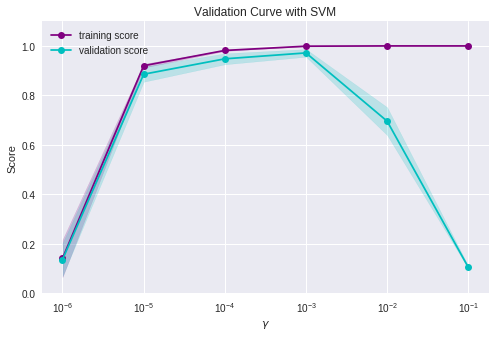

In [34]:
plt.figure(figsize=(8,5))
plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)

plt.semilogx(gamma_values, np.mean(train_score, 1), 'o-', label="training score", color="purple")
plt.fill_between(gamma_values, np.mean(train_score, 1) - np.std(train_score, 1),
                 np.mean(train_score, 1) + np.std(train_score, 1), alpha=0.2,
                 color="purple")
plt.semilogx(gamma_values, np.mean(val_score, 1), 'o-', label="validation score",color="c")
plt.fill_between(gamma_values, np.mean(val_score, 1) - np.std(val_score, 1),
                  np.mean(val_score, 1) + np.std(val_score, 1), alpha=0.2,
                 color="c")
plt.legend()
plt.show()

A similar concept is <b>learning curves</b>, which show training and validation scores as a function of training set size.  

<b>Source</b>: https://scikit-learn.org/stable/modules/learning_curve.html#learning-curve 

In [ ]:
# learning curves

from sklearn.model_selection import learning_curve
from sklearn.naive_bayes import GaussianNB

N, train_score, val_score = learning_curve(GaussianNB(), digits.data, digits.target, cv=5, 
                                                train_sizes=np.linspace(0.1, 0.9, 9))

fig = plt.subplots(1, 1, figsize=(8, 6))
plt.plot(N, np.mean(train_score, 1), 'o-', color='purple', label='training score')
plt.fill_between(N, np.mean(train_score, 1) - np.std(train_score, 1),
                 np.mean(train_score, 1) + np.std(train_score, 1), alpha=0.2,
                 color="purple")
plt.plot(N, np.mean(val_score, 1), 'o-', color='c', label='validation score')
plt.fill_between(N, np.mean(val_score, 1) - np.std(val_score, 1),
                  np.mean(val_score, 1) + np.std(val_score, 1), alpha=0.2,
                 color="c")
plt.ylim(0.5, 1)
plt.xlim(N[0], N[-1])
plt.xlabel('training size')
plt.ylabel('score')
plt.legend()
plt.show()

Scikit-learn also has a tool called `GridSearchCV`, which allows us to search over a grid of parameters for the combination of parameters that yields the best validation score.

We will also make a <b>pipeline</b>, which is helpful when we need to perform the same series of functions multiple times. There are two ways to do this in sklearn: `make_pipeline` or `Pipeline` (we will walk through both).

In [ ]:
# grid search CV with pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV

X = iris.data; y = iris.target

# option 1: Pipeline (define names explicitly)
pipe1 = Pipeline([
        ('scale', StandardScaler()),
        ('reduce_dims', PCA()),
        ('clf', SVC())])

param_grid1 = dict(reduce_dims__n_components=[1,2,3],
                  clf__C=np.logspace(-4, 1, 6),
                  clf__kernel=['rbf','linear'])

# option 2: make_pipeline (auto-generates names)
pipe2 = make_pipeline(StandardScaler(),
                         PCA(),
                        SVC())

param_grid2 = dict(pca__n_components=[1,2,3],
                  svc__C=np.logspace(-4, 1, 6),
                  svc__kernel=['rbf','linear'])

grid = GridSearchCV(pipe1, param_grid=param_grid1, scoring=['accuracy'], refit ='accuracy', cv=3)
grid.fit(X, y)

print('Best Parameters: ', grid.best_params_)
print('Best Score: ', grid.best_score_)

# Unsupervised learning

<b>Goal</b>: look for hidden patterns in the data (we don't have labels for the data).

# Principal Components Analysis (PCA)

PCA is a dimensionality reduction technique that is used to find a smaller set of uncorrelated variables (principal components) from a higher-dimensional set of data. These principal components are sorted based on the proportion of variance in the original data that the components explain (recall Derek's workshop from last week!).


In [ ]:
# PCA for digits data

from sklearn.decomposition import PCA

def plot_digits(data):
    fig, axes = plt.subplots(1, 10, figsize=(10, 4))
    for i in range(10):
        axes[i].imshow(data[i].reshape(8, 8), cmap='binary', interpolation='nearest', clim=(0, 16))
        axes[i].axis('off')
        
X, y = digits.data, digits.target

# instantiate PCA
# can specificy number of components or % variance explained
pca = PCA(n_components=0.90)
pca.fit(X) 
print('N components: ' + str(pca.n_components_))

reduced = pca.transform(X)
filtered = pca.inverse_transform(reduced)

plot_digits(X)
plot_digits(filtered)

In [ ]:
# visualize the first two PCs

fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(1,2,1)
im = ax.scatter(reduced[:, 0], reduced[:, 1], c=y, cmap='tab10',s=40, alpha=.6);
ax.set_title("First 2 PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_xticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.set_yticklabels([])
fig.colorbar(im)

# plot the cumulative percent variance explained 

ax = fig.add_subplot(1,2,2)
ax.plot(np.arange(np.shape(pca.explained_variance_ratio_)[0])+1,np.cumsum(pca.explained_variance_ratio_))
ax.scatter(np.arange(np.shape(pca.explained_variance_ratio_)[0])+1,np.cumsum(pca.explained_variance_ratio_),c='r')
ax.set_xlabel('# components')
ax.set_ylabel('% variance explained');

In [ ]:
print('original shape: ', X.shape)
print('reduced shape: ', reduced.shape)

In [ ]:
# run logistic regression for original and reduced data
for data in [X, reduced]:
    Xtrain, Xtest, ytrain, ytest = train_test_split(data, y, random_state=50)

    clf = LogisticRegression()
    clf.fit(Xtrain,ytrain)
    print(clf.score(Xtest,ytest))

# K-means clustering

Find *k* centroids in the data where each point is assigned to the cluster centroid.

1) Initialize centroids randomly.  
2) Assignment step: assign each point to the nearest centroid.  
3) Update step: the new centroids are defined as the mean of the points that are currently assigned to that centroid.   
4) Repeat assignment and update steps until the assignment of points doesn't change.

In [ ]:
from sklearn.cluster import KMeans
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
X, y_true = iris.data[:,2:], iris.target

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# fix order of clusters
from scipy.stats import mode
labels = np.zeros(y_kmeans.shape)
for i in range(3):
    mask = (y_kmeans==i)
    labels[mask] = mode(y_true[mask])[0]

fig = plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.scatter(X[:,0], X[:,1], c=y_true, s=50, cmap='cool',alpha=.6)
plt.title('True classes')
plt.subplot(1,3,2)
plt.scatter(X[:,0], X[:,1], c=labels, s=50, cmap='cool',alpha=.6)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1],c='black',s=100,alpha=.8)
plt.title('K-means clusters')
plt.subplot(1,3,3)
plt.scatter(X[:,0], X[:,1], c=(y_true==labels), s=50, cmap='coolwarm_r',alpha=.6)
plt.title('Correct label?')

# check accuracy:
print('Accuracy = ', np.sum(labels==y_true)/np.shape(y_true)[0]*100, '%')

In [ ]:
# elbow point plot
from sklearn.metrics import pairwise_distances

distances_all = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    kmeans_distances = pairwise_distances(X,kmeans.cluster_centers_)
    distances_all.append(np.mean(np.min(kmeans_distances,axis=1)))
    
distances_all = np.array(distances_all)

plt.plot(np.arange(10)+1,distances_all)
plt.scatter(np.arange(10)+1,distances_all,c='r')
plt.xlabel('k')
plt.ylabel('Avg distance from cluster centroid')
plt.show()


That's our overview of scikit-learn. Now let's look at some neuroimaging data with nilearn!